In [1]:
!pip install pydicom
!pip install pillow
!pip install matplotlib
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 113.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 93.3 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 84.0 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5━━━━━━ 0/2 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [2]:
import os
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import os
import zipfile

# -----------------------------
# 1. Define project folders
# -----------------------------

# Path to your raw ZIP file
raw_zip_path = "/work/SanzidaAkterChadne#0992/Dicom Data.zip"

# Folder where ZIP content will be extracted
raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/"

# Output folders for converted PNG images
png_us = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/"
png_clin = "/work/main/Raw_data_stenosis/stenosis_project/data/png_clinical/"

# -----------------------------
# 2. Create necessary folders
# -----------------------------

os.makedirs(raw_folder, exist_ok=True)
os.makedirs(png_us, exist_ok=True)
os.makedirs(png_clin, exist_ok=True)

print("Output folders created successfully.")

# -----------------------------
# 3. Extract DICOM ZIP file
# -----------------------------

if os.path.exists(raw_zip_path):
    print("Extracting DICOM ZIP file...")
    with zipfile.ZipFile(raw_zip_path, 'r') as zip_ref:
        zip_ref.extractall(raw_folder)
    print("Extraction completed.")
else:
    print("ZIP file not found! Check the path:", raw_zip_path)

# -----------------------------
# Now raw_folder contains DICOM files
# png_us and png_clin are ready to save PNG outputs
# -----------------------------


Output folders created successfully.
Extracting DICOM ZIP file...
Extraction completed.


In [7]:
import os
import zipfile

raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)"

for filename in os.listdir(raw_folder):

    if filename.lower().endswith(".zip"):
        zip_path = os.path.join(raw_folder, filename)

        # Folder name after extraction
        patient_name = filename.replace(".zip", "")
        extract_path = os.path.join(raw_folder, patient_name)

        # Skip if folder already exists
        if os.path.exists(extract_path):
            print(f"Skipping {filename} — already extracted.")
            continue

        print(f"Extracting: {filename} → {extract_path}")

        os.makedirs(extract_path, exist_ok=True)

        try:
            with zipfile.ZipFile(zip_path, "r") as z:
                z.extractall(extract_path)
            print(f"Done extracting: {filename}")
        except:
            print(f"❌ Failed to extract: {filename}")
            continue

print("✅ Extraction step completed safely.")


Extracting: 10.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/10
Done extracting: 10.zip
Extracting: 35.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/35
Done extracting: 35.zip
Extracting: 15.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/15
Done extracting: 15.zip
Extracting: Record1.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/Record1
Done extracting: Record1.zip
Extracting: 37.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/37
Done extracting: 37.zip
Extracting: record6.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/record6
Done extracting: record6.zip
Extracting: 48.zip → /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)/48
Done extracting: 48.zip
Extracting: 19.zip → /work/main/Raw_dat

In [8]:
import os

raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)"

total_dicom_count = 0

print("Counting DICOM files for each patient folder...\n")

folder_counts = []

for folder_name in os.listdir(raw_folder):
    folder_path = os.path.join(raw_folder, folder_name)

    if os.path.isdir(folder_path):

        dicom_files = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(".dcm")
        ]

        count = len(dicom_files)
        total_dicom_count += count

        folder_counts.append((folder_name, count))


# ----------------------------------------------------------
# SORTING LOGIC:
# 1. Folders starting with "record" come FIRST
#    (sorted by number after "record")
# 2. Numeric folders come NEXT
# ----------------------------------------------------------

def sort_key(item):
    name = item[0]

    # Case 1: "recordX"
    if name.lower().startswith("record"):
        # Extract the number after "record"
        num_part = ''.join(ch for ch in name if ch.isdigit())
        num_value = int(num_part) if num_part else 0
        return (0, num_value)   # group 0 → record folders first

    # Case 2: Pure numbers
    if name.isdigit():
        return (1, int(name))   # group 1 → numeric folders

    # Case 3: Anything else (very rare)
    return (2, name.lower())

# Apply sorting
folder_counts.sort(key=sort_key)

# Print results
for folder_name, count in folder_counts:
    print(f"📁 {folder_name:15} → {count} DICOM files")

print("\n📌 TOTAL DICOM FILES ACROSS ALL FOLDERS:", total_dicom_count)


Counting DICOM files for each patient folder...

📁 Record1         → 47 DICOM files
📁 Record2         → 92 DICOM files
📁 Record3         → 40 DICOM files
📁 record4         → 44 DICOM files
📁 record5         → 60 DICOM files
📁 record6         → 70 DICOM files
📁 record7         → 60 DICOM files
📁 8               → 52 DICOM files
📁 9               → 51 DICOM files
📁 10              → 61 DICOM files
📁 11              → 40 DICOM files
📁 12              → 58 DICOM files
📁 13              → 65 DICOM files
📁 14              → 49 DICOM files
📁 15              → 48 DICOM files
📁 16              → 67 DICOM files
📁 17              → 42 DICOM files
📁 18              → 47 DICOM files
📁 19              → 23 DICOM files
📁 20              → 41 DICOM files
📁 21              → 54 DICOM files
📁 22              → 42 DICOM files
📁 23              → 52 DICOM files
📁 24              → 86 DICOM files
📁 25              → 43 DICOM files
📁 26              → 118 DICOM files
📁 27              → 64 DICOM files
📁 28 

In [9]:
import os
import pydicom
import numpy as np
from PIL import Image

raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)"
png_us = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound"

def load_dicom_safe(path):
    try:
        ds = pydicom.dcmread(path, force=True)
        arr = ds.pixel_array
        return arr, ds
    except:
        return None, None

for root, dirs, files in os.walk(raw_folder):
    for filename in files:
        if filename.lower().endswith(".dcm"):

            dicom_path = os.path.join(root, filename)

            # --------- CREATE SAME SUBFOLDER STRUCTURE ----------
            relative_folder = os.path.relpath(root, raw_folder)
            out_folder = os.path.join(png_us, relative_folder)

            os.makedirs(out_folder, exist_ok=True)

            # Output PNG path
            out_path = os.path.join(out_folder, filename.replace(".dcm", ".png"))

            # Skip duplicates
            if os.path.exists(out_path):
                print("Skipping (already exists):", out_path)
                continue

            img, meta = load_dicom_safe(dicom_path)
            if img is None:
                print("Skipping corrupted:", dicom_path)
                continue

            # Normalize for PNG
            img = img.astype(float)
            img = (img - img.min()) / (img.max() - img.min()) * 255
            img = img.astype(np.uint8)

            pil_img = Image.fromarray(img)
            pil_img.save(out_path)

            print("Saved:", out_path)


Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000035.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000022.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000032.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000001.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000013.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000007.png
Saved: /work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108283019600000

In [10]:
import os

png_us = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound"

print("Counting PNG files inside each patient folder...\n")

folder_counts = []
total_pngs = 0

# Loop through every folder in PNG directory
for folder_name in os.listdir(png_us):
    folder_path = os.path.join(png_us, folder_name)

    if os.path.isdir(folder_path):

        # Count *.png files in this folder
        png_files = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(".png")
        ]

        count = len(png_files)
        total_pngs += count

        folder_counts.append((folder_name, count))

# Sort alphabetically or numerically — optional
folder_counts.sort(key=lambda x: x[0].lower())

# Print results
for folder_name, count in folder_counts:
    print(f"📁 {folder_name:15} → {count} PNG files")

print("\n📌 TOTAL PNG FILES ACROSS ALL FOLDERS:", total_pngs)


Counting PNG files inside each patient folder...

📁 10              → 61 PNG files
📁 11              → 40 PNG files
📁 12              → 58 PNG files
📁 13              → 65 PNG files
📁 14              → 49 PNG files
📁 15              → 48 PNG files
📁 16              → 67 PNG files
📁 17              → 42 PNG files
📁 18              → 47 PNG files
📁 19              → 23 PNG files
📁 20              → 41 PNG files
📁 21              → 54 PNG files
📁 22              → 42 PNG files
📁 23              → 52 PNG files
📁 24              → 86 PNG files
📁 25              → 43 PNG files
📁 26              → 118 PNG files
📁 27              → 64 PNG files
📁 28              → 34 PNG files
📁 29              → 87 PNG files
📁 30              → 31 PNG files
📁 31              → 65 PNG files
📁 32              → 45 PNG files
📁 33              → 60 PNG files
📁 34              → 70 PNG files
📁 35              → 57 PNG files
📁 36              → 34 PNG files
📁 37              → 44 PNG files
📁 38              → 74 PN

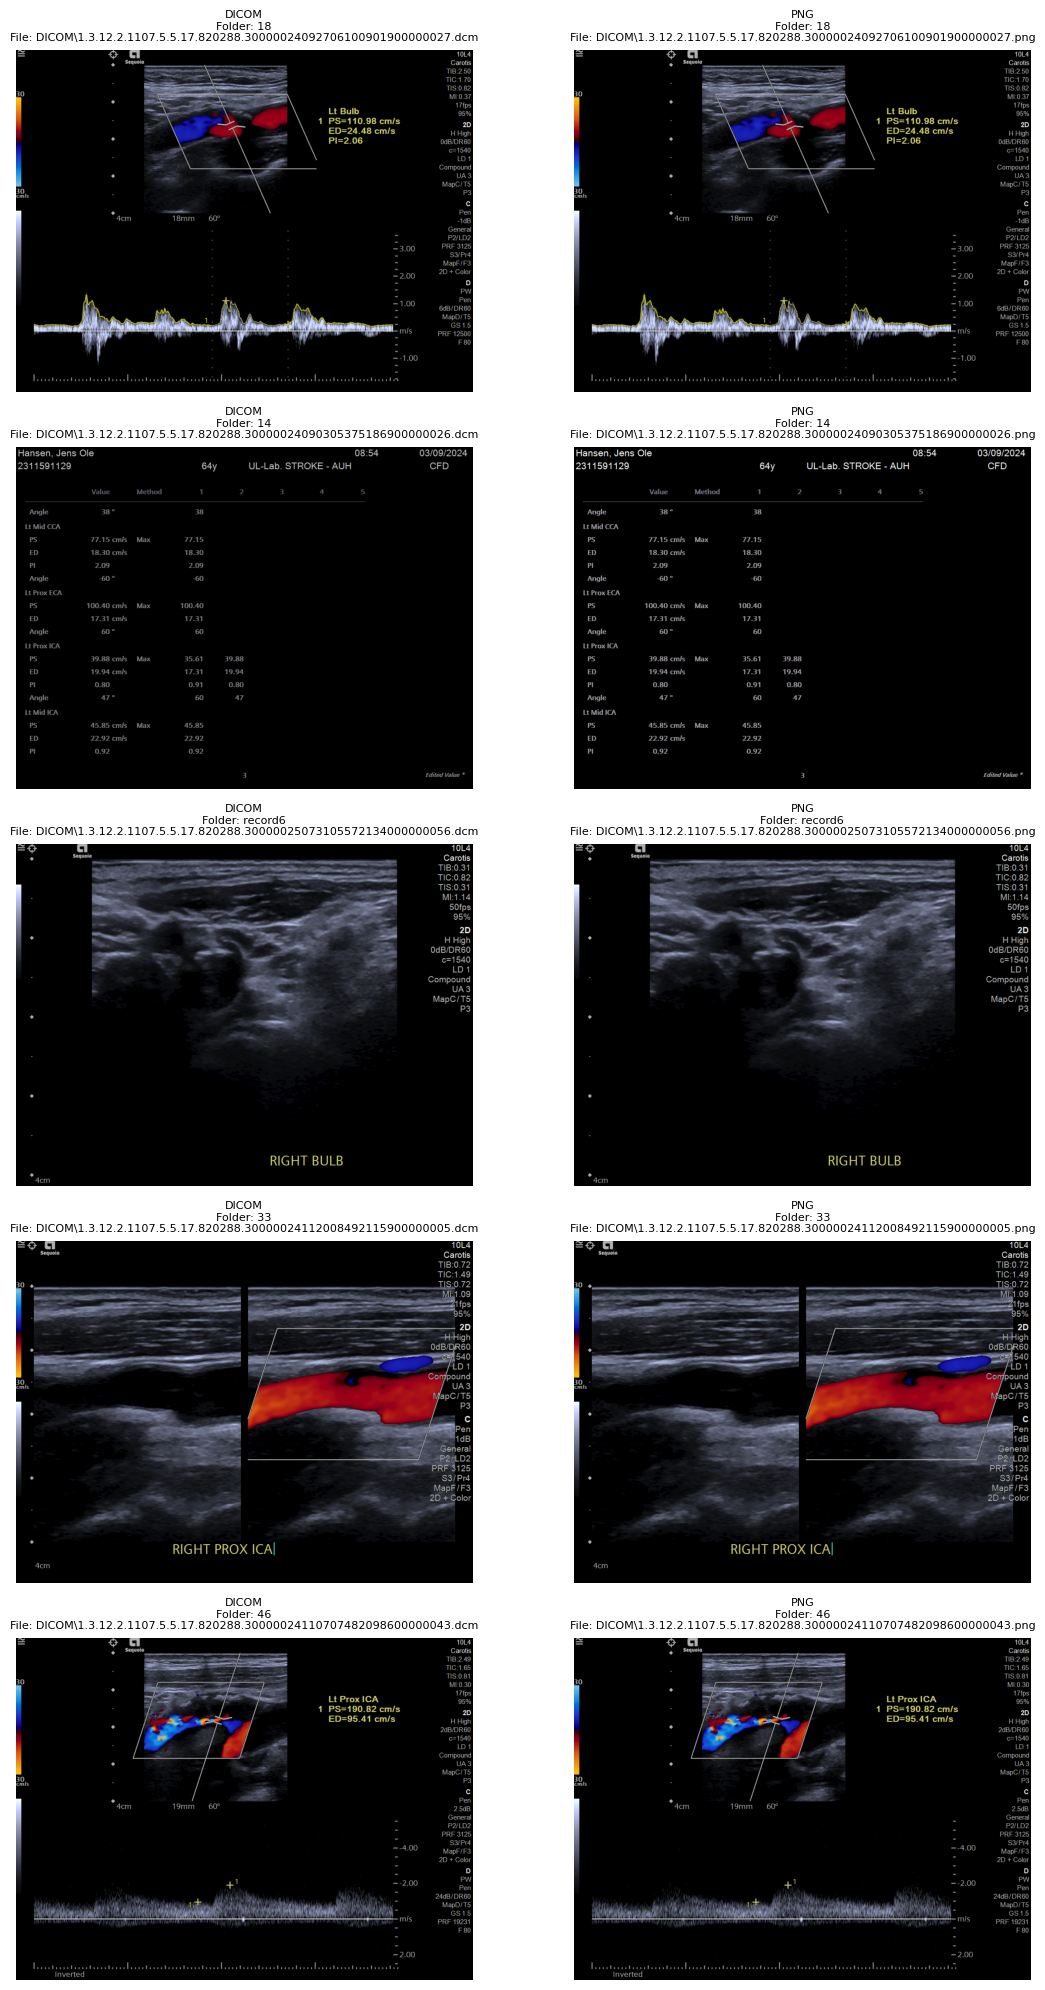

In [11]:
import os
import random
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to your folders
raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)"
png_us = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound"

# --------------------------------------------------------
# Collect ALL DICOM file paths
# --------------------------------------------------------
dicom_paths = []
for root, dirs, files in os.walk(raw_folder):
    for f in files:
        if f.lower().endswith(".dcm"):
            dicom_paths.append(os.path.join(root, f))

# Randomly choose 5 dicoms
sample_dicoms = random.sample(dicom_paths, 5)

# --------------------------------------------------------
# Plot 5 rows × 2 columns (DICOM | PNG)
# --------------------------------------------------------
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

for i, dcm_path in enumerate(sample_dicoms):

    # Load DICOM
    ds = pydicom.dcmread(dcm_path, force=True)
    dicom_img = ds.pixel_array

    # Determine corresponding PNG path
    relative_folder = os.path.relpath(os.path.dirname(dcm_path), raw_folder)
    png_folder = os.path.join(png_us, relative_folder)
    png_path = os.path.join(png_folder, os.path.basename(dcm_path).replace(".dcm", ".png"))

    # Load PNG (if exists)
    if os.path.exists(png_path):
        png_img = np.array(Image.open(png_path))
    else:
        png_img = None

    # ------------------------------
    # Left Column — DICOM
    # ------------------------------
    axes[i, 0].imshow(dicom_img, cmap="gray")
    axes[i, 0].axis("off")
    axes[i, 0].set_title(
        f"DICOM\nFolder: {relative_folder}\nFile: {os.path.basename(dcm_path)}",
        fontsize=8
    )

    # ------------------------------
    # Right Column — PNG
    # ------------------------------
    if png_img is not None:
        axes[i, 1].imshow(png_img, cmap="gray")
        axes[i, 1].set_title(
            f"PNG\nFolder: {relative_folder}\nFile: {os.path.basename(png_path)}",
            fontsize=8
        )
    else:
        axes[i, 1].text(0.5, 0.5, "PNG Not Found", ha="center", va="center")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [13]:
import os
import pydicom
from pydicom.errors import InvalidDicomError
from PIL import Image

# ------------------------------------
# FOLDERS
# ------------------------------------
dicom_src = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom/Dicom Data-Zip (single)"
dicom_dst = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)"

png_src   = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound"
png_dst   = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound_anon"

os.makedirs(dicom_dst, exist_ok=True)
os.makedirs(png_dst, exist_ok=True)

# ------------------------------------
# FIELDS TO REMOVE FROM DICOM (PHI)
# ------------------------------------
remove_tags = [
    "PatientName", "PatientID", "PatientBirthDate",
    "PatientSex", "PatientAge",
    "InstitutionName", "InstitutionAddress",
    "StudyDate", "StudyTime", 
    "ReferringPhysicianName",
    "PerformingPhysicianName",
    "OperatorsName",
]

# -------------------------------------------------------------------------
# 1. DICOM ANONYMIZATION (recursive, keeps folder structure)
# -------------------------------------------------------------------------
print("\n🔵 Anonymizing DICOM files...\n")

for root, dirs, files in os.walk(dicom_src):

    # Mirror directory structure
    rel = os.path.relpath(root, dicom_src)
    anon_folder = os.path.join(dicom_dst, rel)
    os.makedirs(anon_folder, exist_ok=True)

    for f in files:
        if not f.lower().endswith(".dcm"):
            continue

        src_path = os.path.join(root, f)
        dst_path = os.path.join(anon_folder, f)

        try:
            ds = pydicom.dcmread(src_path, force=True)

            # remove metadata fields
            for tag in remove_tags:
                if tag in ds:
                    ds.data_element(tag).value = ""

            # save anonymized dicom
            ds.save_as(dst_path)
            print("✔ DICOM anonymized:", dst_path)

        except InvalidDicomError:
            print("Skipping non-DICOM file:", src_path)
        except Exception as e:
            print("Error processing:", src_path, "->", e)



# -------------------------------------------------------------------------
# 2. PNG ANONYMIZATION (remove EXIF/metadata, keeps folder structure)
# -------------------------------------------------------------------------
print("\n🟢 Anonymizing PNG files...\n")

for root, dirs, files in os.walk(png_src):

    # Mirror directory structure
    rel = os.path.relpath(root, png_src)
    out_folder = os.path.join(png_dst, rel)
    os.makedirs(out_folder, exist_ok=True)

    for f in files:
        if not f.lower().endswith(".png"):
            continue

        src_path = os.path.join(root, f)
        dst_path = os.path.join(out_folder, f)

        try:
            img = Image.open(src_path)
            
            # Remove all metadata by saving clean PNG
            img.save(dst_path, "PNG")

            print("✔ PNG anonymized:", dst_path)

        except Exception as e:
            print("Error processing PNG:", src_path, "->", e)



print("\n✅ ALL DONE — DICOMs and PNGs anonymized successfully!\n")



🔵 Anonymizing DICOM files...

✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000035.dcm
✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000022.dcm
✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000032.dcm
✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000001.dcm
✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/45/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111108083910500000013.dcm
✔ DICOM anonymized: /work/main/Raw_data_stenosis/stenosis_projec

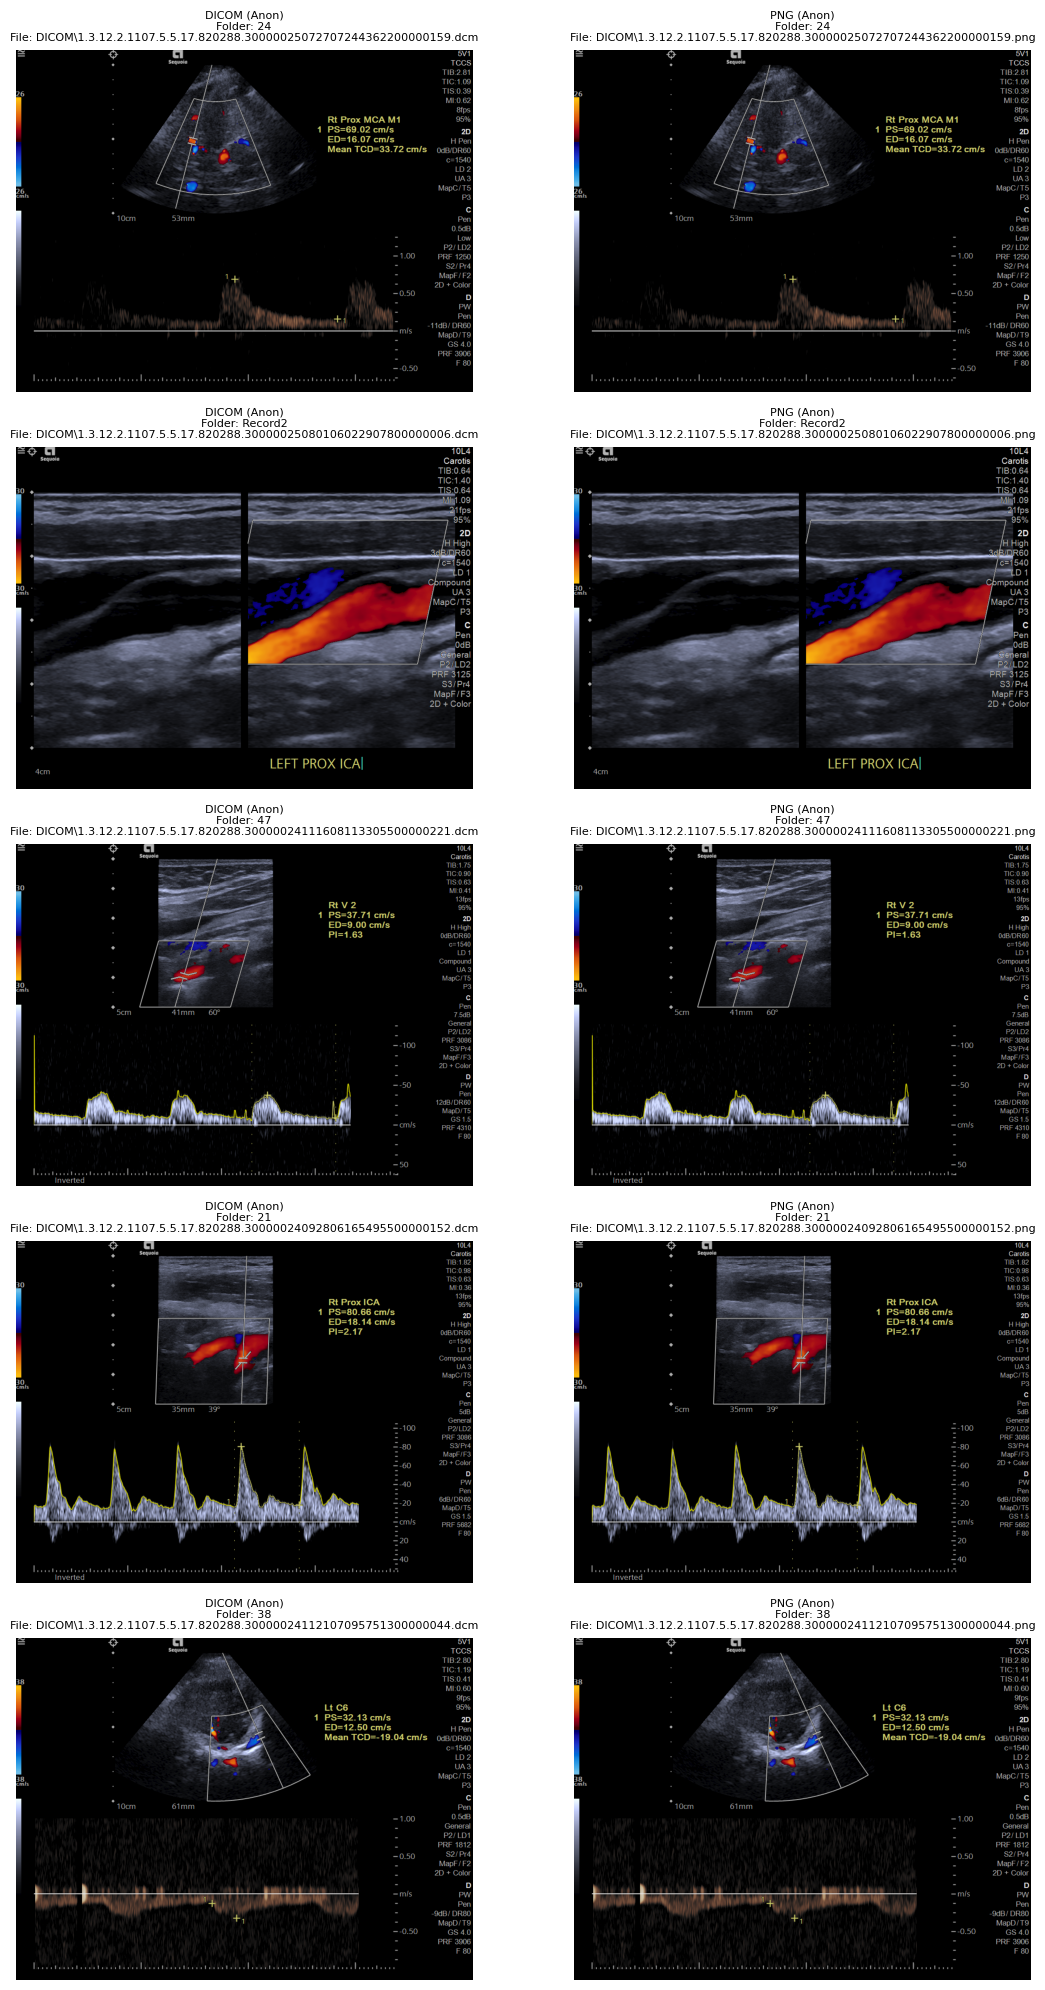

In [14]:
import os
import random
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# NEW anonymized paths
raw_folder = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)"
png_us = "/work/main/Raw_data_stenosis/stenosis_project/data/png_ultrasound_anon"

# --------------------------------------------------------
# Collect all anonymized DICOM paths
# --------------------------------------------------------
dicom_paths = []
for root, dirs, files in os.walk(raw_folder):
    for f in files:
        if f.lower().endswith(".dcm"):
            dicom_paths.append(os.path.join(root, f))

# Randomly choose 5 anonymized DICOMs
sample_dicoms = random.sample(dicom_paths, 5)

# --------------------------------------------------------
# Plot 5 rows × 2 columns (DICOM | PNG)
# --------------------------------------------------------
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

for i, dcm_path in enumerate(sample_dicoms):

    # Load anonymized DICOM
    ds = pydicom.dcmread(dcm_path, force=True)
    dicom_img = ds.pixel_array

    # Determine corresponding PNG path
    relative_folder = os.path.relpath(os.path.dirname(dcm_path), raw_folder)
    png_folder = os.path.join(png_us, relative_folder)
    png_path = os.path.join(png_folder, os.path.basename(dcm_path).replace(".dcm", ".png"))

    # Load PNG if exists
    if os.path.exists(png_path):
        png_img = np.array(Image.open(png_path))
    else:
        png_img = None

    # ------------------------------
    # LEFT COLUMN — DICOM
    # ------------------------------
    axes[i, 0].imshow(dicom_img, cmap="gray")
    axes[i, 0].axis("off")
    axes[i, 0].set_title(
        f"DICOM (Anon)\nFolder: {relative_folder}\nFile: {os.path.basename(dcm_path)}",
        fontsize=8
    )

    # ------------------------------
    # RIGHT COLUMN — PNG
    # ------------------------------
    if png_img is not None:
        axes[i, 1].imshow(png_img, cmap="gray")
        axes[i, 1].set_title(
            f"PNG (Anon)\nFolder: {relative_folder}\nFile: {os.path.basename(png_path)}",
            fontsize=8
        )
    else:
        axes[i, 1].text(0.5, 0.5, "PNG Not Found", ha="center", va="center")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [16]:
import os, pydicom

anon_dir = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)"

# find first DICOM file in all subfolders
selected_dcm = None
for root, dirs, files in os.walk(anon_dir):
    for f in files:
        if f.lower().endswith(".dcm"):
            selected_dcm = os.path.join(root, f)
            break
    if selected_dcm:
        break

ds = pydicom.dcmread(selected_dcm, force=True)

check_tags = [
    "PatientName", "PatientID", "PatientBirthDate",
    "PatientSex", "PatientAge", "InstitutionName",
    "StudyDate", "StudyTime"
]

for tag in check_tags:
    if tag in ds:
        print(tag, "→", ds.data_element(tag).value)


PatientName → 
PatientID → 
PatientBirthDate → 
PatientSex → 
PatientAge → 
InstitutionName → 
StudyDate → 
StudyTime → 


In [17]:
import pydicom
import os

anon_dir = "/work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)"

# --------------------------------------------------------
# Find ALL anonymized DICOM paths in all subfolders
# --------------------------------------------------------
dicom_files = []
for root, dirs, files in os.walk(anon_dir):
    for f in files:
        if f.lower().endswith(".dcm"):
            dicom_files.append(os.path.join(root, f))

# Pick first 3 anonymized DICOMs (safe even with subfolders)
sample_files = dicom_files[:3]

# --------------------------------------------------------
# Check PHI fields inside the anonymized files
# --------------------------------------------------------
for f in sample_files:
    ds = pydicom.dcmread(f, force=True)
    
    print("----", f, "----")
    print("PatientName:", ds.get("PatientName"))
    print("PatientID:", ds.get("PatientID"))
    print("PatientBirthDate:", ds.get("PatientBirthDate"))
    print("PatientSex:", ds.get("PatientSex"))
    print("PatientAge:", ds.get("PatientAge"))
    print("InstitutionName:", ds.get("InstitutionName"))
    print("StudyDate:", ds.get("StudyDate"))
    print("StudyTime:", ds.get("StudyTime"))
    print()


---- /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/40/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111808224244400000153.dcm ----
PatientName: 
PatientID: 
PatientBirthDate: 
PatientSex: 
PatientAge: 
InstitutionName: 
StudyDate: 
StudyTime: 

---- /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/40/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111808224244400000181.dcm ----
PatientName: 
PatientID: 
PatientBirthDate: 
PatientSex: 
PatientAge: 
InstitutionName: 
StudyDate: 
StudyTime: 

---- /work/main/Raw_data_stenosis/stenosis_project/data/raw_dicom_anon/Dicom Data-Zip (single)/40/DICOM\1.3.12.2.1107.5.5.17.820288.30000024111808224244400000147.dcm ----
PatientName: 
PatientID: 
PatientBirthDate: 
PatientSex: 
PatientAge: 
InstitutionName: 
StudyDate: 
StudyTime: 

